# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# define path
path =r"C:\Users\repla\Documents"

In [4]:
# Import Data
ords_prods_merge = pd.read_csv(r"C:\Users\repla\Documents\02 Data\Original Data\customers.csv", index_col = False)

In [5]:
ords_prods_merge.head()

,user_id,First Name,Surnam,Gender,STATE,Age,date_joined,n_dependants,fam_status,income
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665
1,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285
2,65803,Kenneth,Farley,Male,Idaho,35,1/1/2017,2,married,99568
3,125935,Michelle,Hicks,Female,Iowa,40,1/1/2017,0,single,42049
4,130797,Ann,Gilmore,Female,Maryland,26,1/1/2017,1,married,40374


In [6]:
ords_prods_merge.shape

(206209, 10)

In [7]:
ords_prods_merge.describe()

,user_id,Age,n_dependants,income
count,206209.000000,206209.000000,206209.000000,206209.000000
mean,103105.000000,49.501646,1.499823,94632.852548
std,59527.555167,18.480962,1.118433,42473.786988
min,1.000000,18.000000,0.000000,25903.000000
25%,51553.000000,33.000000,0.000000,59874.000000
50%,103105.000000,49.000000,1.000000,93547.000000
75%,154657.000000,66.000000,3.000000,124244.000000
max,206209.000000,81.000000,3.000000,593901.000000


In [8]:
#4
ords_prods_merge['user_id'] = ords_prods_merge['user_id'].astype('str')

In [9]:
ords_prods_merge['date_joined'] = pd.to_datetime(ords_prods_merge['date_joined'])

In [10]:
ords_prods_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206209 entries, 0 to 206208
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   user_id       206209 non-null  object        
 1   First Name    194950 non-null  object        
 2   Surnam        206209 non-null  object        
 3   Gender        206209 non-null  object        
 4   STATE         206209 non-null  object        
 5   Age           206209 non-null  int64         
 6   date_joined   206209 non-null  datetime64[ns]
 7   n_dependants  206209 non-null  int64         
 8   fam_status    206209 non-null  object        
 9   income        206209 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 15.7+ MB


In [11]:
#code to check for columns that have mixed data type
for col in ords_prods_merge.columns.tolist():
    weird = (ords_prods_merge[[col]].map(type) != ords_prods_merge[[col]].iloc[0].apply(type)).any(axis = 1)
    
    if len (ords_prods_merge[weird]) > 0:
        print (col)

First Name


In [12]:
# casting first_name to string as its a mixed type
ords_prods_merge['First Name'] = ords_prods_merge['First Name'].astype('str')

In [13]:
#rename first name, surnam, gender, state and age
ords_prods_merge.rename(columns={"First Name":"first_name", "Surnam":"last_name", "Gender":"gender", "STATE":"state",
                            "Age":"age"}, inplace=True)

In [14]:
ords_prods_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206209 entries, 0 to 206208
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   user_id       206209 non-null  object        
 1   first_name    206209 non-null  object        
 2   last_name     206209 non-null  object        
 3   gender        206209 non-null  object        
 4   state         206209 non-null  object        
 5   age           206209 non-null  int64         
 6   date_joined   206209 non-null  datetime64[ns]
 7   n_dependants  206209 non-null  int64         
 8   fam_status    206209 non-null  object        
 9   income        206209 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 15.7+ MB


In [15]:
#5
ords_prods_merge.columns[ords_prods_merge.isnull().any()]

Index([], dtype='object')

In [16]:
ords_prods_merge['first_name'].isnull().sum()

0

In [17]:
ords_prods_merge['income'].value_counts(dropna=False, sort=True)

income
57192     10
95891     10
95710     10
97532      9
98675      9
          ..
73141      1
71524      1
74408      1
44780      1
148828     1
Name: count, Length: 108012, dtype: int64

In [18]:
ords_prods_merge['gender'].value_counts(dropna=False)

gender
Male      104067
Female    102142
Name: count, dtype: int64

In [19]:
ords_prods_merge['state'].nunique()

51

In [20]:
# list all states to check for duplicates and error names.
ords_prods_merge['state'].value_counts(dropna=False)

state
Florida                 4044
Colorado                4044
Illinois                4044
Alabama                 4044
District of Columbia    4044
Hawaii                  4044
Arizona                 4044
Connecticut             4044
California              4044
Indiana                 4044
Arkansas                4044
Alaska                  4044
Delaware                4044
Iowa                    4044
Idaho                   4044
Georgia                 4044
Wyoming                 4043
Mississippi             4043
Oklahoma                4043
Utah                    4043
New Hampshire           4043
Kentucky                4043
Maryland                4043
Rhode Island            4043
Massachusetts           4043
Michigan                4043
New Jersey              4043
Kansas                  4043
South Dakota            4043
Minnesota               4043
Tennessee               4043
New York                4043
Washington              4043
Louisiana               4043
Montana 

In [21]:
ords_prods_merge['age'].describe()

count    206209.000000
mean         49.501646
std          18.480962
min          18.000000
25%          33.000000
50%          49.000000
75%          66.000000
max          81.000000
Name: age, dtype: float64

In [22]:
#checking for any null values or odd ages
ords_prods_merge['age'].value_counts()

age
19    3329
55    3317
51    3317
56    3306
32    3305
      ... 
65    3145
25    3127
66    3114
50    3102
36    3101
Name: count, Length: 64, dtype: int64

In [23]:
#min value
ords_prods_merge['date_joined'].min()

Timestamp('2017-01-01 00:00:00')

In [24]:
#max value
ords_prods_merge['date_joined'].max()

Timestamp('2020-04-01 00:00:00')

In [25]:
#value counts
ords_prods_merge['date_joined'].value_counts(dropna=False, sort=False)

date_joined
2017-01-01    159
2017-01-02    154
2017-01-03    169
2017-01-04    188
2017-01-05    177
             ... 
2020-03-28    197
2020-03-29    171
2020-03-30    165
2020-03-31    149
2020-04-01    169
Name: count, Length: 1187, dtype: int64

In [26]:
# value counts of n_dependants
ords_prods_merge['n_dependants'].value_counts(dropna=False)

n_dependants
0    51602
3    51594
1    51531
2    51482
Name: count, dtype: int64

<Axes: xlabel='# of dependants', ylabel='Frequency'>

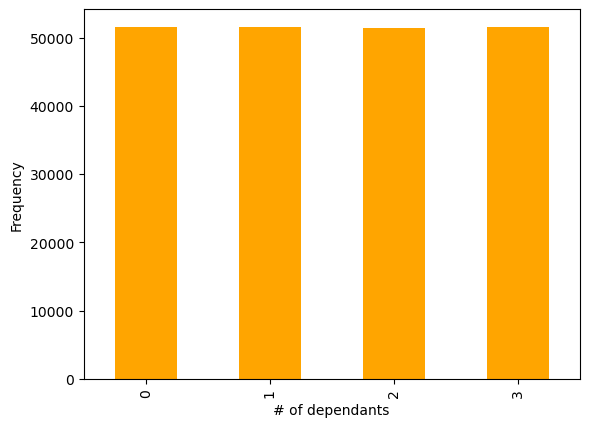

In [28]:
ords_prods_merge['n_dependants'].value_counts(dropna=True).sort_index().plot.bar(color=['orange'], ylabel='Frequency', 
                                xlabel='# of dependants')

In [29]:
ords_prods_merge['fam_status'].value_counts(dropna=False)

fam_status
married                             144906
single                               33962
divorced/widowed                     17640
living with parents and siblings      9701
Name: count, dtype: int64

In [30]:
ords_prods_merge['income'].describe()

count    206209.000000
mean      94632.852548
std       42473.786988
min       25903.000000
25%       59874.000000
50%       93547.000000
75%      124244.000000
max      593901.000000
Name: income, dtype: float64

In [31]:
ords_prods_merge['income'].median()

93547.0

In [32]:
ords_prods_merge_income = ords_prods_merge[ords_prods_merge['income'] > 300000]

In [33]:
ords_prods_merge_income.sort_values(by='income', ascending=True, )

,user_id,first_name,last_name,gender,state,age,date_joined,n_dependants,fam_status,income
979,200930,Charles,Nichols,Male,South Carolina,60,2017-01-06,1,married,300913
86870,71498,Gloria,Stafford,Female,Virginia,69,2018-05-14,3,married,302234
138764,151552,Mark,Neal,Male,Oklahoma,71,2019-03-11,1,married,302363
47787,205650,Jeremy,Vang,Male,Kentucky,62,2017-10-02,0,divorced/widowed,302526
58395,77541,Kimberly,Anderson,Female,Montana,25,2017-12-03,2,married,302561
...,...,...,...,...,...,...,...,...,...,...
167037,189861,Pamela,Jordan,Female,Pennsylvania,47,2019-08-21,0,single,584097
111950,187680,Catherine,Church,Female,Wyoming,43,2018-10-07,2,married,590790
81583,103702,Kathryn,Mclaughlin,Female,Louisiana,55,2018-04-14,3,married,591089
202655,98580,nan,Patterson,Male,Washington,43,2020-03-12,2,married,592409


In [34]:
opm_dups = ords_prods_merge[ords_prods_merge.duplicated()]

In [35]:
opm_dups.shape

(0, 10)

In [36]:
#6
df_opm = pd.read_pickle(r"C:\Users\repla\Documents\02 Data\Prepared Data\orders_products_merged4.8.pkl")

In [37]:
df_opm.shape

(1000000, 25)

In [38]:
df_opm['prices'] = df_opm['prices'].astype('float32')

In [39]:
df_opm['mean_expenses'] = df_opm['prices'].astype('float32')

In [40]:
df_opm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 26 columns):
 #   Column                  Non-Null Count    Dtype   
---  ------                  --------------    -----   
 0   product_id              1000000 non-null  int64   
 1   product_name            1000000 non-null  object  
 2   aisle_id                1000000 non-null  int64   
 3   department_id           1000000 non-null  int64   
 4   prices                  1000000 non-null  float32 
 5   order_id                1000000 non-null  int64   
 6   user_id                 1000000 non-null  int64   
 7   order_number            1000000 non-null  int64   
 8   orders_day_of_week      1000000 non-null  int64   
 9   time_of_order           1000000 non-null  int64   
 10  days_since_prior_order  933795 non-null   float64 
 11  add_to_cart_order       1000000 non-null  int64   
 12  reordered               1000000 non-null  int64   
 13  _merge                  1000000 non-null  c

In [41]:
df_opm.drop(columns=['_merge'], inplace=True)

In [45]:
df_opm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 25 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   product_id              1000000 non-null  int64  
 1   product_name            1000000 non-null  object 
 2   aisle_id                1000000 non-null  int64  
 3   department_id           1000000 non-null  int64  
 4   prices                  1000000 non-null  float32
 5   order_id                1000000 non-null  int64  
 6   user_id                 1000000 non-null  object 
 7   order_number            1000000 non-null  int64  
 8   orders_day_of_week      1000000 non-null  int64  
 9   time_of_order           1000000 non-null  int64  
 10  days_since_prior_order  933795 non-null   float64
 11  add_to_cart_order       1000000 non-null  int64  
 12  reordered               1000000 non-null  int64  
 13  price_range             1000000 non-null  object 
 14  pri

In [44]:
df_opm['user_id'] = df_opm['user_id'].astype('str')

In [46]:
# merge with customers using user_id
df_opm_cust_left = df_opm.merge(ords_prods_merge, on=['user_id'], indicator=True)

In [47]:
df_opm_cust_left['_merge'].value_counts(dropna=False)

_merge
both          1000000
left_only           0
right_only          0
Name: count, dtype: int64

In [48]:
df_opm_cust_left.shape

(1000000, 35)

In [49]:
df_opm_cust_left.drop(columns=['_merge'], inplace=True)

In [50]:
df_opm_cust_left.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   product_id              1000000 non-null  int64         
 1   product_name            1000000 non-null  object        
 2   aisle_id                1000000 non-null  int64         
 3   department_id           1000000 non-null  int64         
 4   prices                  1000000 non-null  float32       
 5   order_id                1000000 non-null  int64         
 6   user_id                 1000000 non-null  object        
 7   order_number            1000000 non-null  int64         
 8   orders_day_of_week      1000000 non-null  int64         
 9   time_of_order           1000000 non-null  int64         
 10  days_since_prior_order  933795 non-null   float64       
 11  add_to_cart_order       1000000 non-null  int64         
 12  reordered      

In [52]:
#8
df_opm_cust_left.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_merged4.9.part1.pkl'))